# Encuesta trimestral de coste laboral (ETCL)
La Encuesta trimestral de coste laboral (ETCL) es una operación estadística continua de periodicidad trimestral cuyo objetivo fundamental es conocer la evolución del coste laboral medio por trabajador y mes, el coste laboral medio por hora efectiva de trabajo y del tiempo trabajado y no trabajado.  

**Fuente:** https://www.ine.es/dyngs/INEbase/es/operacion.htm?c=Estadistica_C&cid=1254736045053&menu=ultiDatos&idp=1254735976596 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Coste laboral por hora efectiva, comunidad autónoma, sectores de actividad
df = pd.read_csv("coste-laboral-por-hora.csv", sep=";")
df.sort_values("Periodo", ascending=False).head()

,Comunidades y Ciudades Autónomas,Sectores de actividad CNAE 2009,Componentes del coste,Periodo,Total
0,Total Nacional,"B_S Industria, construcción y servicios (excep...",Coste laboral total por hora,2024T4,"25,63"
6936,06 Cantabria,Industria,Coste salarial ordinario por hora,2024T4,"16,81"
6528,06 Cantabria,"B_S Industria, construcción y servicios (excep...",Coste laboral total por hora,2024T4,"24,63"
6596,06 Cantabria,"B_S Industria, construcción y servicios (excep...",Coste salarial total por hora,2024T4,"18,39"
6664,06 Cantabria,"B_S Industria, construcción y servicios (excep...",Coste salarial ordinario por hora,2024T4,"14,69"


In [3]:
# Conocer valores de cada columna
for col in df.columns:
    print(f"--- Categoría de {col}: ---\n", df[col].unique(), "\n")

--- Categoría de Comunidades y Ciudades Autónomas: ---
 ['Total Nacional' '01 Andalucía' '02 Aragón' '03 Asturias, Principado de'
 '04 Balears, Illes' '05 Canarias' '06 Cantabria' '07 Castilla y León'
 '08 Castilla - La Mancha' '09 Cataluña' '10 Comunitat Valenciana'
 '11 Extremadura' '12 Galicia' '13 Madrid, Comunidad de'
 '14 Murcia, Región de' '15 Navarra, Comunidad Foral de' '16 País Vasco'
 '17 Rioja, La'] 

--- Categoría de Sectores de actividad CNAE 2009: ---
 ['B_S Industria, construcción y servicios (excepto actividades de los hogares como empleadores y de organizaciones y organismos extraterritoriales)'
 'Industria' 'Construcción' 'Servicios'] 

--- Categoría de Componentes del coste: ---
 ['Coste laboral total por hora' 'Coste salarial total por hora'
 'Coste salarial ordinario por hora' 'Otros costes por hora'] 

--- Categoría de Periodo: ---
 ['2024T4' '2024T3' '2024T2' '2024T1' '2023T4' '2023T3' '2023T2' '2023T1'
 '2022T4' '2022T3' '2022T2' '2022T1' '2021T4' '2021T3' '202

In [4]:
# Renombrar columnas
df.columns = ['comunidades', 'cnae_2009', 'tipo_coste', 'periodo', 'total']
df.head(2)

,comunidades,cnae_2009,tipo_coste,periodo,total
0,Total Nacional,"B_S Industria, construcción y servicios (excep...",Coste laboral total por hora,2024T4,"25,63"
1,Total Nacional,"B_S Industria, construcción y servicios (excep...",Coste laboral total por hora,2024T3,"25,08"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19584 entries, 0 to 19583
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   comunidades  19584 non-null  object
 1   cnae_2009    19584 non-null  object
 2   tipo_coste   19584 non-null  object
 3   periodo      19584 non-null  object
 4   total        19584 non-null  object
dtypes: object(5)
memory usage: 765.1+ KB


In [6]:
# separar año y trimestre
df['año'] = df['periodo'].str[:4].astype(int)
df['trimestre'] = df['periodo'].str[4:]

In [7]:
# convertir total en numérico
df['total'] = df['total'].str.replace(',', '.')
df['total'] = df['total'].astype('float')

## EDA

Se analizará el coste salarial ordinario por hora, ya que proporciona una medida más precisa y estable del salario base, ya que excluye pagos extraordinarios y no periódicos, reduciendo el impacto de valores atípicos.

In [230]:
# Filtrar conjunto de datos a utilizar
data = df[(df.comunidades != 'Total Nacional')
           & (df.tipo_coste == 'Coste salarial ordinario por hora')
           & (df.año == 2024)]

In [229]:
# Calcular métricas de tendencia central
from scipy.stats import trim_mean

# Calcular métricas
media = salario.mean()
mediana = salario.median()
moda = salario.mode().values[0]  # Toma solo el primer valor en caso de múltiples modas
media_truncada = trim_mean(salario, 0.1)

# Crear tabla con los valores
tabla = pd.DataFrame({
    'Métrica': ['Media', 'Mediana', 'Moda', 'Media Truncada'],
    'Valor': [media, mediana, moda, media_truncada]
})

# Mostrar la tabla
tabla = tabla.set_index('Métrica')
tabla.head()

,Valor
Métrica,
Media,14.671569
Mediana,14.210000
Moda,14.880000
Media Truncada,14.477317


In [264]:
# variables comunes a todos los gráficos
heading_fontsize = 10
heading_fontweight = 'bold'
subheading_fontsize = 9
subheading_fontweight = 'normal'
source_fontsize = 6.5
source_fontweight = 'light'

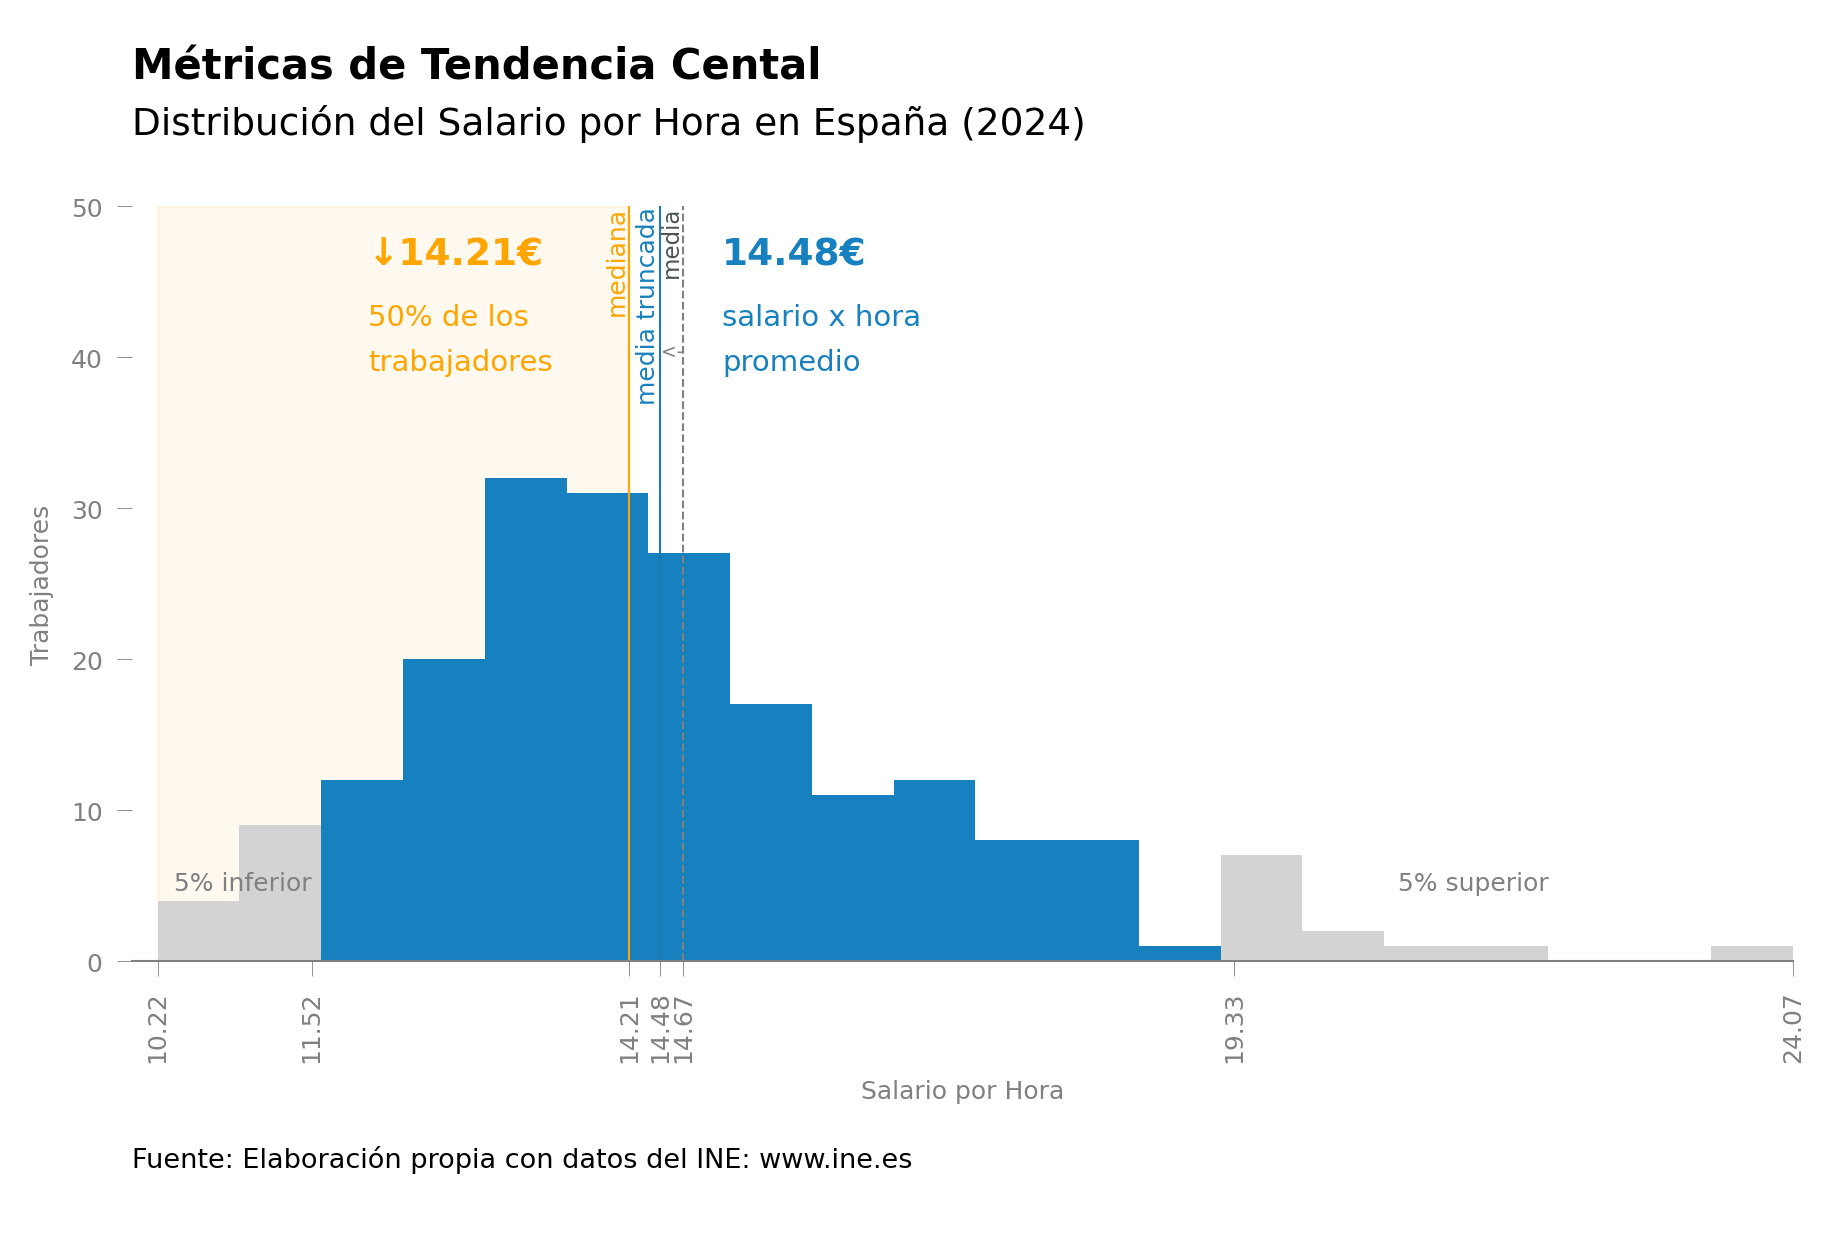

In [270]:
import numpy as np
from highlight_text import ax_text
from scipy.stats import trim_mean

# Configurar layout
layout = [['title'], ['plot'], ['notes']]
fig, axs = plt.subplot_mosaic(layout, figsize=(6, 4), dpi=300, 
                             gridspec_kw={'height_ratios': [2, 12, 1]}, 
                             constrained_layout=True)

## ----- TÍTULO -----
ax_title = axs['title']
ax_title.axis('off')
ax_text(
    ax=ax_title, s='<Métricas de Tendencia Cental>\n<Distribución del Salario por Hora en España (2024)>',
    x=0, y=1, fontsize=10, va='top', ha='left',
    highlight_textprops=[{'fontsize': heading_fontsize, 'fontweight': heading_fontweight},
                         {'fontsize': subheading_fontsize, 'fontweight': subheading_fontweight}]
)


## ----- GRÁFICO -----
ax_plot = axs['plot']

# Graficar histograma según tipo de sector
salario = data[(data.cnae_2009.isin(['Servicios', 'Construcción', 'Industria']))]['total']

# Calcular percentiles 5 y 95
p05 = salario.quantile(0.05)
p95 = salario.quantile(0.95)

# Crear histograma sin color (solo para obtener valores)
counts, bins, _ = ax_plot.hist(salario, bins=20, alpha=0)

# Calcular centros de los bins
bin_centers = (bins[:-1] + bins[1:]) / 2

# Dibujar barras manualmente con colores según condición
for i in range(len(bins) - 1):
    color = 'lightgray' if bins[i] < p05 or bins[i+1] > p95 else '#1780bf'
    ax_plot.bar(bin_centers[i], counts[i], width=bins[i+1] - bins[i], color=color)


## Graficar métricas
# Graficar línea con la media
media = salario.mean()
ax_plot.axvline(x=media, linestyle='--', linewidth=0.5, ymax=1, color='gray')
ax_plot.text(
    s='media', x=media, y=50, ha='right', va='top',
    fontsize=5.5, rotation=90, color='#4e5356'
)

# Graficar línea con la media truncada 10%
media_truncada = trim_mean(salario, 0.1)
ax_plot.axvline(x=media_truncada, linestyle='-', linewidth=0.5, ymax=1)
ax_plot.text(
    s='media truncada', x=media_truncada, y=50, ha='right', va='top', 
    fontsize=6, color='#1780bf', rotation=90
)

# Graficar línea con la mediana
mediana = salario.median()
ax_plot.axvline(x=mediana, linestyle='-', linewidth=0.5, ymin=-2, color='orange', ymax=1)
ax_plot.text(
    s='mediana', x=mediana, y=50, ha='right', va='top', 
    fontsize=6, color='orange', rotation=90
)

# Agregar flecha de la media a la mediana
ax_plot.annotate(text='<-', xy=(media, 40), fontsize=4.5, color='gray', ha='right')

# Agregar información sobre mediana
ax_text(
    ax=ax_plot, s=f'<↓{mediana:.2f}€>\n<50% de los> \n<trabajadores>',
    x=12, y=48, va='top', ha='left', color='orange',
    highlight_textprops=[{'fontsize': 9, 'fontweight': heading_fontweight},
                         {'fontsize': 7, 'fontweight': subheading_fontweight},
                        {'fontsize': 7, 'fontweight': subheading_fontweight}]
)
# Sombrear área perteneciente al texto
ax_plot.axvspan(xmin=salario.min(), xmax=mediana, color='orange', alpha=0.06, zorder=0)

# Agregar información sobre la median
ax_text(
    ax=ax_plot, s=f'<{media_truncada:.2f}€>\n<salario x hora> \n<promedio>',
    x=15, y=48, va='top', ha='left', color='#1780bf', linespacing=0.5,
    highlight_textprops=[{'fontsize': 9, 'fontweight': heading_fontweight},
                         {'fontsize': 7, 'fontweight': subheading_fontweight},
                        {'fontsize': 7, 'fontweight': subheading_fontweight}]
)

# Agregar identificación de percentiles utilizados para media truncada
[ax_plot.text(s=s, x=p, y=6, ha='right', va='top', fontsize=6, color='gray') 
              for p, s in zip([p05, 22], ['5% inferior', '5% superior'])]

# Personalizar ejes
ax_plot.set_xlim(10, 24)
ticks = [media, mediana, media_truncada, salario.min(), salario.max(), p05, p95] # Definir posiciones de los ticks del eje x
ax_plot.set_xticks(ticks)
ax_plot.set_xticklabels([f'{x:.2f}' for x in ticks], fontsize=6, rotation=90, ha='center', va='top')
ax_plot.set_yticks(np.arange(0, 51, 10))
ax_plot.set_yticklabels(np.arange(0, 51, 10))
ax_plot.tick_params(axis='x', colors='gray', labelsize=6, width=0.2)
ax_plot.tick_params(axis='y', colors='gray', labelsize=6, width=0.2)
ax_plot.set_ylabel('Trabajadores', fontsize=6, color='gray')
ax_plot.set_xlabel('Salario por Hora', fontsize=6, color='gray')
[ax_plot.spines[side].set_visible(False) for side in ['top', 'right', 'left']]
ax_plot.spines[['bottom']].set_color('gray')
ax_plot.spines[['bottom']].set_linewidth(0.5)

## ----- FUENTE -----
ax_notes = axs['notes']
ax_notes.axis('off')
ax_text(
    ax=ax_notes, s='Fuente: Elaboración propia con datos del INE: www.ine.es', 
    x=0, y=.5, fontsize=source_fontsize, fontweight=source_fontweight, 
    ha='left', va='bottom', color='black'
)


# Mostrar y guardar gráfico
plt.savefig('metricas_tcentral.png', dpi=300)
plt.show()

La distribución del salario por hora en cada sector muestra un sesgo hacia la derecha, por lo que existen valores atípicos que pueden distorcionar la media tradicional.  
Se grafica la media truncada ya que es menos sensible a estos valores atípicos y proporciona una medida más robusta del centro de la distribución.  
